In [1]:
import sys
import numpy as np
sys.path.insert(0, "../..")
import scirpy as ir
import scanpy as sc
import pandas as pd
import anndata
import warnings
from matplotlib import pyplot as plt
from numba import NumbaPerformanceWarning

# ignore numba performance warnings
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

# suppress "storing XXX as categorical" warnings.
anndata.logging.anndata_logger.setLevel("ERROR")

In [11]:
trajectory_clusters = sc.read('/scratch/annotated_trajectory_umap.h5ad')

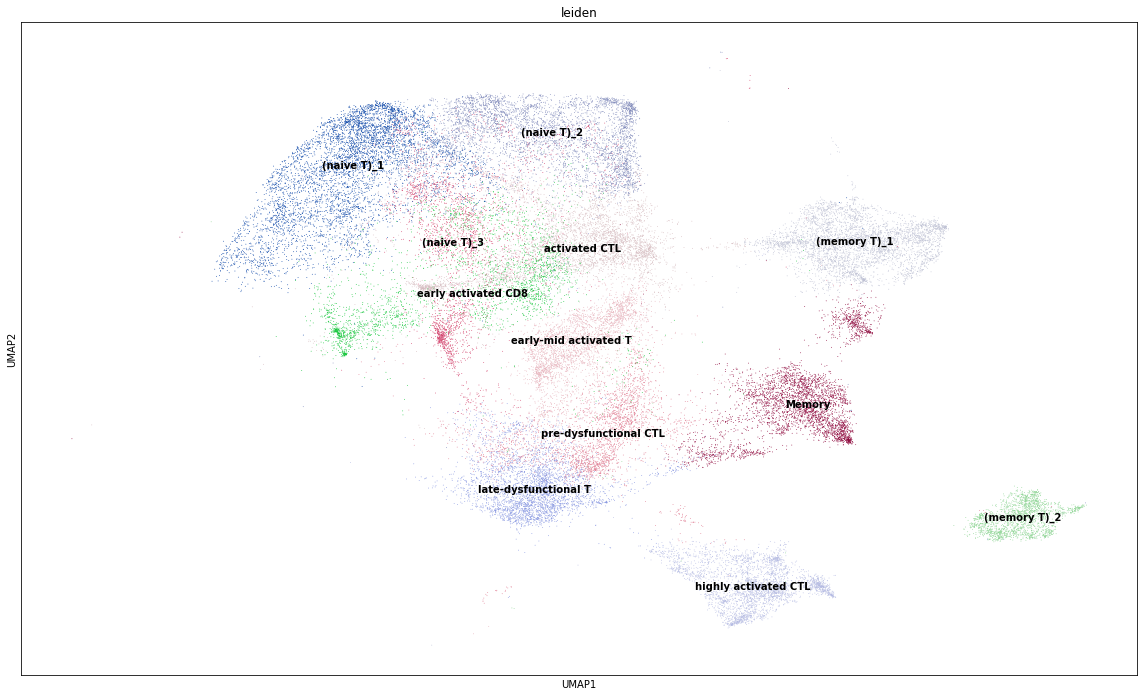

In [12]:
fig, ax = plt.subplots(figsize=(20, 12))
sc.pl.umap(trajectory_clusters, color='leiden', legend_loc='on data', ax=ax)

In [13]:
sc.tl.paga(trajectory_clusters, groups='leiden')

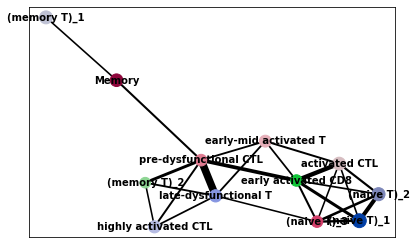

In [26]:
sc.pl.paga(trajectory_clusters, color=['leiden'],threshold=0.2, show=False)

In [27]:
sc.tl.draw_graph(trajectory_clusters, init_pos='paga')

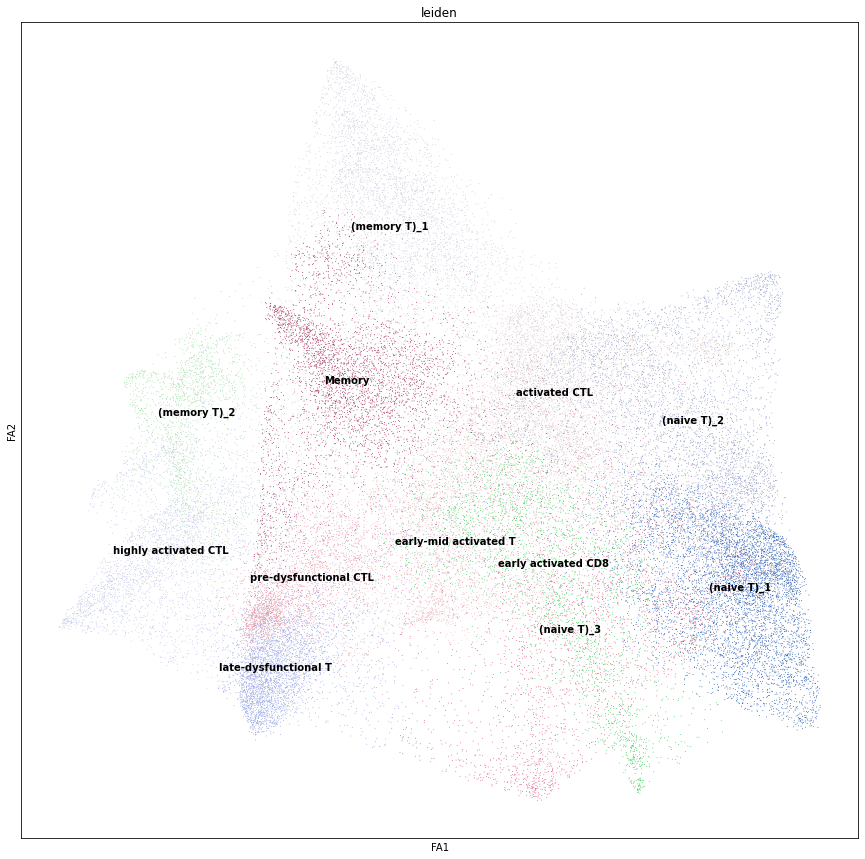

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.draw_graph(trajectory_clusters, legend_loc='on data', color=['leiden'],ax=ax)

In [31]:
trajectory_clusters.uns['iroot'] = np.flatnonzero(trajectory_clusters.obs['leiden']  == '(naive T)_1')[0]

In [32]:
sc.tl.dpt(trajectory_clusters)

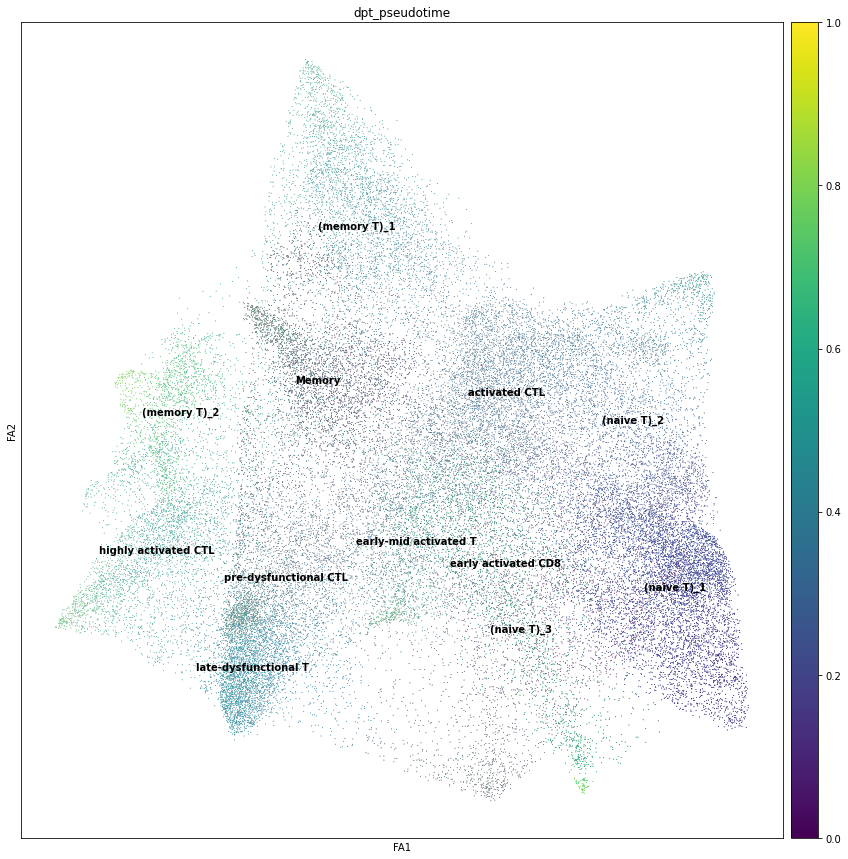

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.draw_graph(trajectory_clusters, color=['leiden'], legend_loc='on data',ax=ax, show=False)
sc.pl.draw_graph(trajectory_clusters, color=['dpt_pseudotime'], legend_loc='on data',ax=ax)